In [1]:
import pandas as pd 
import numpy as np

## Songs dataset

In [2]:
songs = pd.read_csv("data/spotify_songs.csv")

### drop the 5 entries that didn't have song titles

In [3]:
nan_counts = songs.isna().sum()
# print(nan_counts)

In [4]:
songs.dropna(inplace=True)

In [5]:
songs.shape

(32828, 23)

### Plot the numerical column distributions

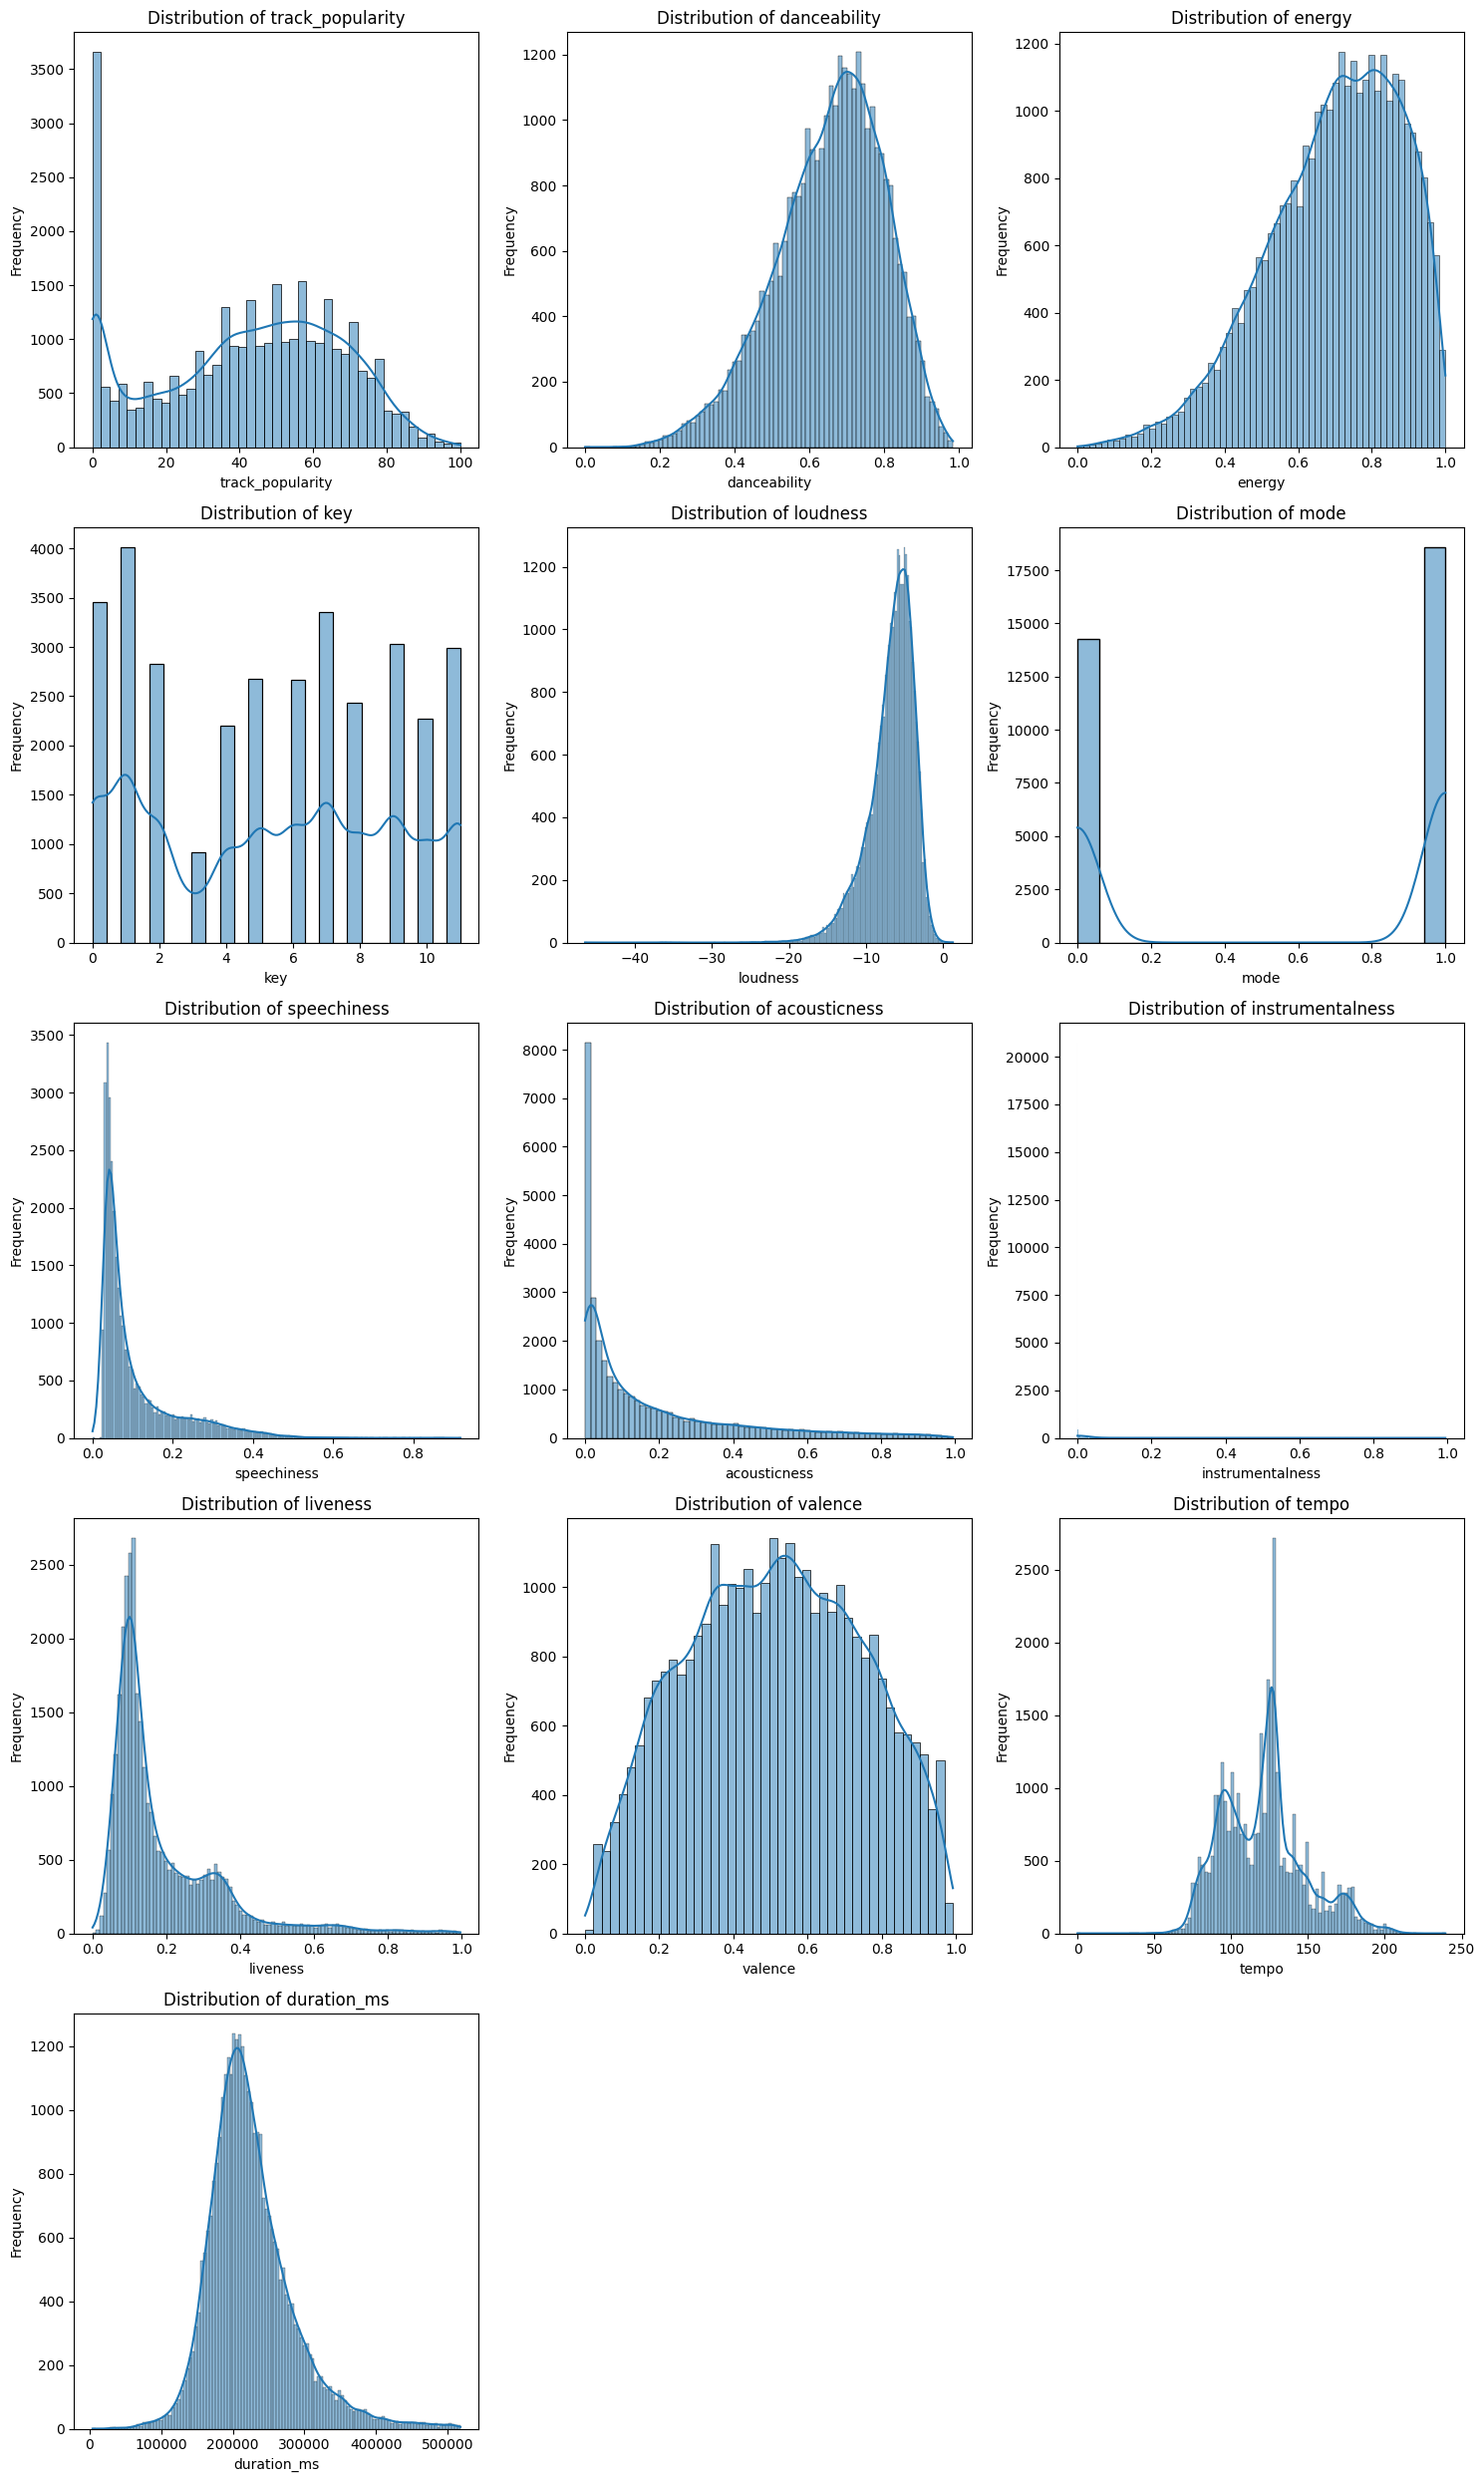

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming `df` is your DataFrame
numeric_columns = songs.select_dtypes(include=['number']).columns

# Determine the number of rows and columns based on the number of columns to plot
n_cols = 3  # You can adjust this number
n_rows = int(np.ceil(len(numeric_columns) / n_cols))  # Calculate required rows

# Set up the plot
plt.figure(figsize=(15, 5 * n_rows))

# Plot each numeric column
for i, col in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i+1)  # Create subplots based on dynamic row/column count
    sns.histplot(songs[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Look at the distribution of genre and subgenre

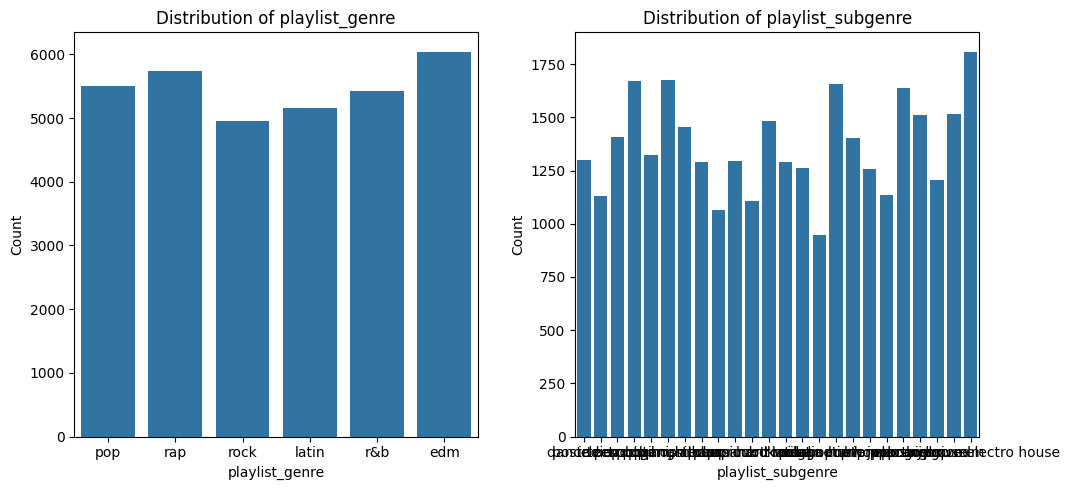

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming `df` is your DataFrame
drop_cols = ['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_id', 'playlist_name']
categorical_columns = songs.select_dtypes(include=['object', 'category']).columns.drop(drop_cols)

# Determine the number of rows and columns based on the number of columns to plot
n_cols = 3  # You can adjust this number
n_rows = int(np.ceil(len(categorical_columns) / n_cols))  # Calculate required rows

# Set up the plot
plt.figure(figsize=(15, 5 * n_rows))

# Plot each categorical column
for i, col in enumerate(categorical_columns):
    plt.subplot(n_rows, n_cols, i+1)  # Create subplots based on dynamic row/column count
    sns.countplot(data=songs, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [8]:
songs["playlist_subgenre"].unique()

array(['dance pop', 'post-teen pop', 'electropop', 'indie poptimism',
       'hip hop', 'southern hip hop', 'gangster rap', 'trap',
       'album rock', 'classic rock', 'permanent wave', 'hard rock',
       'tropical', 'latin pop', 'reggaeton', 'latin hip hop',
       'urban contemporary', 'hip pop', 'new jack swing', 'neo soul',
       'electro house', 'big room', 'pop edm',
       'progressive electro house'], dtype=object)

## Playlist dataset

In [6]:
# Read CSV and skip problematic rows
playlists = pd.read_csv("data/spotify_dataset.csv", on_bad_lines='skip')

# Check the first few rows to ensure it loaded correctly
playlists.head()


,user_id,"""artistname""","""trackname""","""playlistname"""
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010


In [7]:
nan_counts = playlists.isna().sum()
print(nan_counts)

user_id                0
 "artistname"      33572
 "trackname"          88
 "playlistname"     1246
dtype: int64


In [8]:
playlists.dropna(inplace=True)

In [8]:
playlists.shape

(12856831, 4)

### fix the column names

In [9]:
# Assuming your DataFrame is named 'songs'
# Remove leading/trailing spaces and quotation marks from column names
playlists.columns = playlists.columns.str.replace('"', '').str.strip()

# Check the updated column names
print(playlists.columns)


Index(['user_id', 'artistname', 'trackname', 'playlistname'], dtype='object')


### finally clean the datasets so that the song in one are also in the other

In [15]:
# Standardize column values (lowercase, stripped spaces)
songs['track_name'] = songs['track_name'].str.lower().str.strip()
playlists['trackname'] = playlists['trackname'].str.lower().str.strip()

In [16]:
# Step 1: Identify the common artists between both tables
common_artists = songs['track_name'].isin(playlists['trackname'])

# Step 2: Filter both tables to include only the common artists
songs_cleaned = songs[common_artists]
playlists_cleaned = playlists[playlists['trackname'].isin(songs['track_name'])]


### check the shape difference to see what has been dropped

In [17]:
songs.shape

(32828, 23)

In [18]:
songs_cleaned.shape
# songs_cleaned.head()

(21312, 23)

In [19]:
playlists.shape

(12856831, 4)

In [20]:
playlists_cleaned.shape

(2405015, 4)

### make another dataset for the tree

In [ ]:
merged_df = playlists_cleaned.merge(songs_cleaned, left_on='trackname', right_on='track_name', how='left').drop(columns=['track_name'])

### save the cleaned datasets

In [ ]:
songs_cleaned.to_csv('cleaned_data/songs_cleaned.csv', index=False)

In [23]:
merged_df.to_csv('cleaned_data/merged.csv', index=False)

## Clean playlist songs into matrix factorization formatting

In [13]:
playlists_cleaned = playlists_cleaned.drop(columns=['artistname', 'playlistname'], axis=0)

In [14]:
playlists_cleaned["value"] = 1
playlists_cleaned.shape

(2243139, 3)

In [15]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
  Using cached scipy-1.13.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached scipy-1.13.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
hdbscan 0.8.38.post1 requires joblib>=1.0, which is not installed.
sentence-transformers 3.0.1 requires huggingface-hub>=0.15.1, which is not installed.
sentence-transformers 3.0.1 requires Pillow, which is not installed.
sentence-transformers 3.0.1 requires tqdm, which is not installed.
umap-learn 0.5.6 requires numba>=0.51.2, which is not installed.
umap-learn 0.5.6 requires pynndescent>=0.5, which is not installed.
umap-learn 0.5.6 requires tqdm, which is not installed.
scikit-learn 1.5.1 requires joblib>=1.2.0, which is not installed.
scikit-

In [16]:
import scipy.sparse
from pandas.api.types import CategoricalDtype

users = playlists_cleaned["user_id"].unique()
songs = playlists_cleaned["trackname"].unique()
shape = (len(users), len(songs))

user_cat = CategoricalDtype(categories=sorted(users), ordered = True)
song_cat = CategoricalDtype(categories=sorted(songs), ordered = True)
user_ind = playlists_cleaned["user_id"].astype(user_cat).cat.codes
song_ind = playlists_cleaned["trackname"].astype(song_cat).cat.codes

coo = scipy.sparse.coo_matrix((playlists_cleaned["value"], (user_ind, song_ind)), shape = shape)


In [17]:
csr = coo.tocsr()
csr_df = pd.DataFrame(csr.toarray())
csr_df = csr_df.set_axis(songs, axis = 1).set_axis(users, axis=0)
csr_df.head()

#sdf = csr_df.astype(pd.SparseDtype("float", 0))


,Beautiful,Dance Tonight,Don't Dream It's Over,Fall At Your Feet,Here We Go,Lie To Me,Live And Let Die,Mastermind,Only You,Winter,...,Altair,Bon appétit,Como el Agua,Llegaste a Mi,Barking,The Coming Storm,I'll Give All My Love to You,Uplifted,Paul Scholes,Calypso - Original Mix
9cc0cfd4d7d7885102480dd99e7a90d6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
07f0fc3be95dcd878966b1f9572ff670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
944c80d26922ae634d6ce445b1fdff7f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
c5cdf06b5f1836006ef2a2fe4f5ff103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
f3743cac98b7255c3c4a23be09dee7e6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#sdf2 = sdf.sparse.to_dense()
#sdf2.head()

,Beautiful,Dance Tonight,Don't Dream It's Over,Fall At Your Feet,Here We Go,Lie To Me,Live And Let Die,Mastermind,Only You,Winter,...,Altair,Bon appétit,Como el Agua,Llegaste a Mi,Barking,The Coming Storm,I'll Give All My Love to You,Uplifted,Paul Scholes,Calypso - Original Mix
9cc0cfd4d7d7885102480dd99e7a90d6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
07f0fc3be95dcd878966b1f9572ff670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
944c80d26922ae634d6ce445b1fdff7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c5cdf06b5f1836006ef2a2fe4f5ff103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f3743cac98b7255c3c4a23be09dee7e6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# If you want to save 'csr_df' as well:
csr_df.to_csv('cleaned_data/csr_df.csv', index=False)